### Lab 2: Генератор трехмерного случайного ветора
Задана функция плотности случайного трехмерного вектора:

$$f = \frac{2}{3} (x + y + z)$$

Используя методы символьных вычислений, выведем формулы для генератора такого вектора.

Импортируем необходимые библиотеки.

**numpy** - для работы с матрицами,  
**sympy** - для реализации символьных вычислений,  
**matplotlib** - для построения графиков.

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

Если 
$$U \sim \mathrm{Uniform}[0,1],$$
то
$$F^{-1}(U) \sim F $$

При помощи библиотеки **sympy** задаем необходимые обозначения.  
x, y, z - компоненты трехмерного вектора,  
a, b, c - переменные для интегрирования,  
ux, uy, uz - компоненты U:

In [2]:
x, y, z = symbols('x y z')

a, b, c = symbols('a b c')

ux, uy, uz = symbols('ux uy uz')

Задаем функцию плотности:

In [3]:
f = (x + y + z) * 2 / 3

Интегрируем ее по x и получаем функцию распределения по х:

In [4]:
Fx = integrate(f, (x, 0, a), (y, 0, 1), (z, 0, 1))
Fx

a**2/3 + 2*a/3

Маргинальное распределиние x выглядит следующим образом:

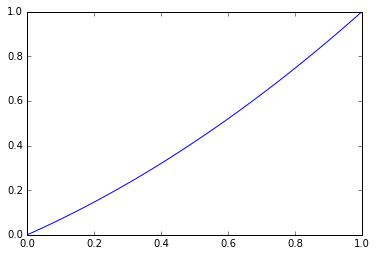

In [5]:
plt.plot(
    np.linspace(0, 1.0, num=100),
    [ Fx.subs(a, va) for va in  np.linspace(0, 1.0, num=100)]
)

Решаем уравнение 
$$F(a) = U,$$
получаем $$F^{-1}(U)$$

In [6]:
inv_Fx = solve(Fx - ux, a)
inv_Fx

[-sqrt(3*ux + 1) - 1, sqrt(3*ux + 1) - 1]

In [7]:
inv_Fx = inv_Fx[1]

Далее проделываем всё то же самое для y при фиксированном x:

In [8]:
Fy = integrate(f, (y, 0, b), (z, 0, 1) ) / integrate(f, (y, 0, 1), (z, 0, 1))
Fy

(b**2/3 + 2*b*x/3 + b/3)/(2*x/3 + 2/3)

1


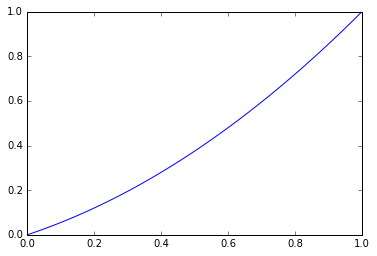

In [9]:
Fy_at_x0 = Fy.subs(x, 0)

vys = np.linspace(0, 1.0, num=100)

plt.plot(
    vys,
    [ Fy_at_x0.subs(b, vy) for vy in vys]
)

print Fy_at_x0.subs(b, 1)

In [10]:
inv_Fy = solve(Fy - uy, b)
inv_Fy

[-x - sqrt(8*uy*x + 8*uy + 4*x**2 + 4*x + 1)/2 - 1/2,
 -x + sqrt(8*uy*x + 8*uy + 4*x**2 + 4*x + 1)/2 - 1/2]

In [11]:
inv_Fy = inv_Fy[1]

И те же самые вычисления для z (при фиксированных x и y):

In [12]:
Fz = integrate(f, (z, 0, c)) / integrate(f, (z, 0, 1))
Fz

(c**2/3 + c*(2*x/3 + 2*y/3))/(2*x/3 + 2*y/3 + 1/3)

In [13]:
inv_Fz = solve(Fz - uz, c)
inv_Fz

[-x - y - sqrt(2*uz*x + 2*uz*y + uz + x**2 + 2*x*y + y**2),
 -x - y + sqrt(2*uz*x + 2*uz*y + uz + x**2 + 2*x*y + y**2)]

In [14]:
inv_Fz = inv_Fz[1]

In [15]:
n = 1000
U = np.random.uniform(0.0, 1.0, size = (n, 3))

In [16]:
xs = np.array([inv_Fx.subs(ux, vx) for vx in U[:, 0]]).astype('float64')

ys = np.array([
        inv_Fy.subs(x, xs[i]).subs(uy, U[i, 1])
        for i in xrange(n)
]).astype('float64')

zs = np.array([
        inv_Fz.subs(x, xs[i]).subs(y, ys[i]).subs(uz, U[i, 2])
        for i in xrange(n)
]).astype('float64')

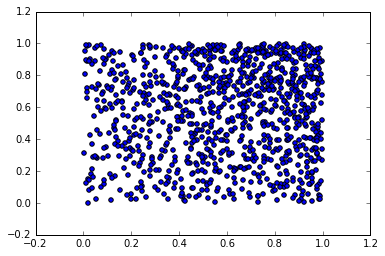

In [17]:
plt.scatter(xs, ys)

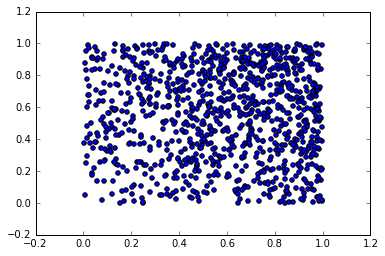

In [18]:
plt.scatter(xs, zs)

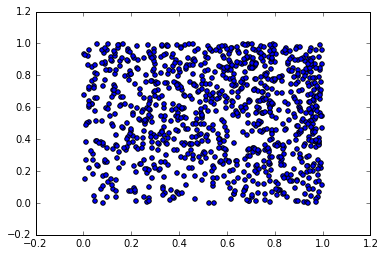

In [19]:
plt.scatter(ys, zs)